# Windows Function

1. Moving Average
2. Rolling Average
3. Ranking & percentile
4. Expanding Aggregation
5. Time Based Analysis
6. Comparative Analysis
7. Exponensital Moving Average
8. Risk Analysis
9. Lag & Lead Calculation


In [47]:
import pandas as pd
import seaborn as sns
from vega_datasets import data # random data

import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
dir(data) # Check available data

In [10]:
stock = data.stocks()[['date','price']]
stock.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


### Lag Function

In [17]:
# lag1 (Comparing today price with yesterday or price today vs yesterday)
stock["price_lag"] = stock["price"].shift(1)
stock.head()

,date,price,price_lag
0,2000-01-01,39.81,NaN
1,2000-02-01,36.35,39.81
2,2000-03-01,43.22,36.35
3,2000-04-01,28.37,43.22
4,2000-05-01,25.45,28.37


In [20]:
# lag2 (comparing todays price with 2 days before price)
stock['price_lag2'] = stock['price'].shift(2)
stock.head()

,date,price,price_lag,price_lag2
0,2000-01-01,39.81,NaN,NaN
1,2000-02-01,36.35,39.81,NaN
2,2000-03-01,43.22,36.35,39.81
3,2000-04-01,28.37,43.22,36.35
4,2000-05-01,25.45,28.37,43.22


In [21]:
# lag3 : comparing todays price with 3 days before price
stock['price_lag3'] = stock['price'].shift(3)
stock.head()

,date,price,price_lag,price_lag2,price_lag3
0,2000-01-01,39.81,NaN,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN
2,2000-03-01,43.22,36.35,39.81,NaN
3,2000-04-01,28.37,43.22,36.35,39.81
4,2000-05-01,25.45,28.37,43.22,36.35


### Lead Function

In [22]:
# lead 1 : comparing todays price with next day price
stock['price_lead'] = stock.price.shift(-1)
stock.head()


,date,price,price_lag,price_lag2,price_lag3,price_lead
0,2000-01-01,39.81,NaN,NaN,NaN,36.35
1,2000-02-01,36.35,39.81,NaN,NaN,43.22
2,2000-03-01,43.22,36.35,39.81,NaN,28.37
3,2000-04-01,28.37,43.22,36.35,39.81,25.45
4,2000-05-01,25.45,28.37,43.22,36.35,32.54


In [27]:
stock.tail()

,date,price,price_lag,price_lag2,price_lag3,price_lead
555,2009-11-01,199.91,188.50,185.35,168.21,210.73
556,2009-12-01,210.73,199.91,188.50,185.35,192.06
557,2010-01-01,192.06,210.73,199.91,188.50,204.62
558,2010-02-01,204.62,192.06,210.73,199.91,223.02
559,2010-03-01,223.02,204.62,192.06,210.73,NaN


In [23]:
stock.count() # count without Nan

date          560
price         560
price_lag     559
price_lag2    558
price_lag3    557
price_lead    559
dtype: int64

In [24]:
stock.isna().sum() # check any missing value

date          0
price         0
price_lag     1
price_lag2    2
price_lag3    3
price_lead    1
dtype: int64

In [26]:
stock.duplicated().sum()

0

# Rolling Average

In [29]:
# 5 days rolling average
stock["Price_rolling_averge"] = stock['price'].rolling(5).mean()
stock.head(10)

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.640
5,2000-06-01,32.54,25.45,28.37,43.22,28.40,33.186
6,2000-07-01,28.40,32.54,25.45,28.37,28.40,31.596
7,2000-08-01,28.40,28.40,32.54,25.45,24.53,28.632
8,2000-09-01,24.53,28.40,28.40,32.54,28.02,27.864
9,2000-10-01,28.02,24.53,28.40,28.40,23.34,28.378


In [30]:
# Verify1
stock.price[:5].mean() # Mean of top 5 values

34.64

In [31]:
# Verify2
stock["price"][1:6].mean()

33.18599999999999

In [34]:
# Verify2- lets round  up to 3 decimal points
round(stock["price"][1:6].mean(),3)

33.186

## Rolling Sum

In [35]:
# rolling sum for 2 days
stock["price_rolling_sum"] = stock.price.rolling(2).sum()
stock.head()

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge,price_rolling_sum
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN,76.16
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN,79.57
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN,71.59
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.64,53.82


In [37]:
# Find the max value of rolling 5 days
stock["price_rolling_max"] = stock["price"].rolling(5).max()
stock["price_rolling_min"] = stock["price"].rolling(5).min()
stock.head(10)

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge,price_rolling_sum,price_rolling_max,price_rolling_min
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN,NaN,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN,76.16,NaN,NaN
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN,79.57,NaN,NaN
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN,71.59,NaN,NaN
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.640,53.82,43.22,25.45
5,2000-06-01,32.54,25.45,28.37,43.22,28.40,33.186,57.99,43.22,25.45
6,2000-07-01,28.40,32.54,25.45,28.37,28.40,31.596,60.94,43.22,25.45
7,2000-08-01,28.40,28.40,32.54,25.45,24.53,28.632,56.80,32.54,25.45
8,2000-09-01,24.53,28.40,28.40,32.54,28.02,27.864,52.93,32.54,24.53
9,2000-10-01,28.02,24.53,28.40,28.40,23.34,28.378,52.55,32.54,24.53


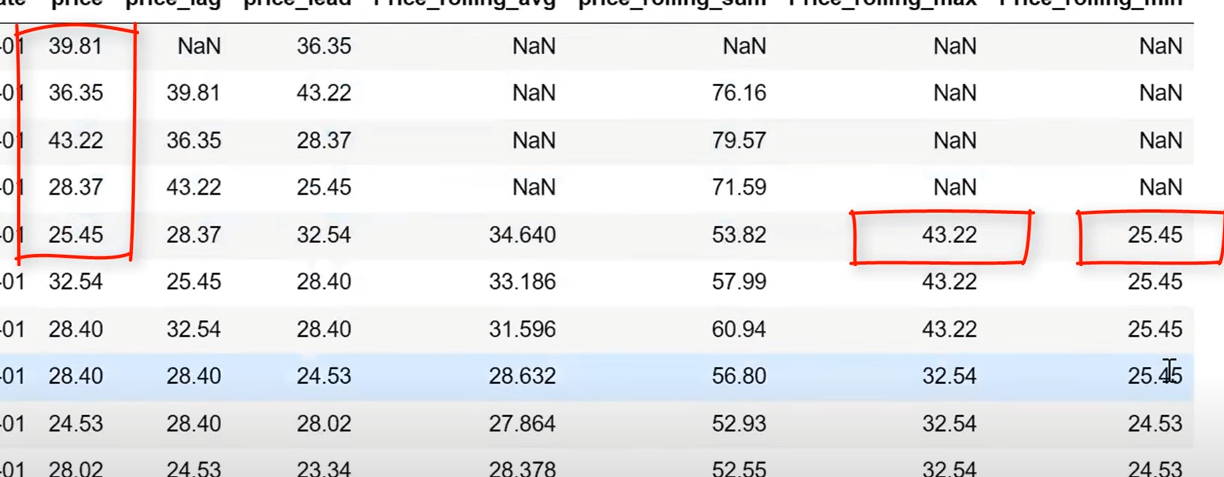

## How to change in stock price in Percentage

In [44]:
stock_2 = stock[['date', 'price']]
stock_2.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


In [48]:
# How to change in stock price in Percentage
stock_2['price_percentage'] = stock['price'].pct_change(1)*100
stock_2.head()

,date,price,price_percentage
0,2000-01-01,39.81,NaN
1,2000-02-01,36.35,-8.691284
2,2000-03-01,43.22,18.899587
3,2000-04-01,28.37,-34.359093
4,2000-05-01,25.45,-10.292563


In [56]:
(36.35-39.81) / 39.81 * 100 # verifed1

-8.69128359708616

In [57]:
(43.22-36.35) / 36.35 *100 # verifed1

18.899587345254464

In [52]:
stock_2['price_perc_2'] = stock['price'].pct_change(2)*100
stock_2.head()

,date,price,price_percentage,price_perc_2
0,2000-01-01,39.81,NaN,NaN
1,2000-02-01,36.35,-8.691284,NaN
2,2000-03-01,43.22,18.899587,8.565687
3,2000-04-01,28.37,-34.359093,-21.953232
4,2000-05-01,25.45,-10.292563,-41.115224


In [55]:
(43.22-39.81) / 39.81 *100

8.56568701331323

In [54]:
(28.37-36.35) / 36.35	*100

-21.953232462173318